In [1054]:

# IMPORTING LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [890]:

# IMPORTING DATASET

df=pd.read_csv(r"D:\Priyal\From College\CODING\Python ML Project\flood_risk_dataset_india.csv")
df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


In [891]:

# EXPLORATORY DATA ANALYSIS


In [892]:
#checking for null values
df.isnull().sum()

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64

In [893]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

In [894]:
df.describe()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Population Density,Infrastructure,Historical Floods,Flood Occurred
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,22.330627,82.631366,150.015118,29.961401,59.749104,2515.722946,5.017881,4417.138177,5021.468442,0.502000,0.498700,0.505700
std,8.341274,8.389542,86.032127,8.669838,23.142734,1441.706442,2.876579,2530.245421,2882.591520,0.500021,0.500023,0.499993
min,8.000337,68.004575,0.014437,15.000166,20.001339,0.042161,0.002701,1.150340,2.289000,0.000000,0.000000,0.000000
25%,15.143537,75.364428,76.124373,22.405717,39.541778,1284.782376,2.538847,2229.681903,2491.766601,0.000000,0.000000,0.000000
50%,22.283330,82.671007,150.620428,30.000907,59.497375,2530.451944,5.042094,4417.199761,5074.392879,1.000000,0.000000,1.000000
75%,29.460184,89.937897,223.402156,37.413488,80.038163,3767.229862,7.524692,6616.729066,7474.228752,1.000000,1.000000,1.000000
max,36.991813,96.997820,299.970293,44.993681,99.997772,4999.698480,9.996899,8846.894877,9999.169530,1.000000,1.000000,1.000000


In [895]:
df['Land Cover'].unique()

array(['Water Body', 'Forest', 'Agricultural', 'Desert', 'Urban'],
      dtype=object)

In [896]:
df['Soil Type'].unique()

array(['Clay', 'Peat', 'Loam', 'Sandy', 'Silt'], dtype=object)

Text(0.5, 1.0, 'Correlation Heatmap')

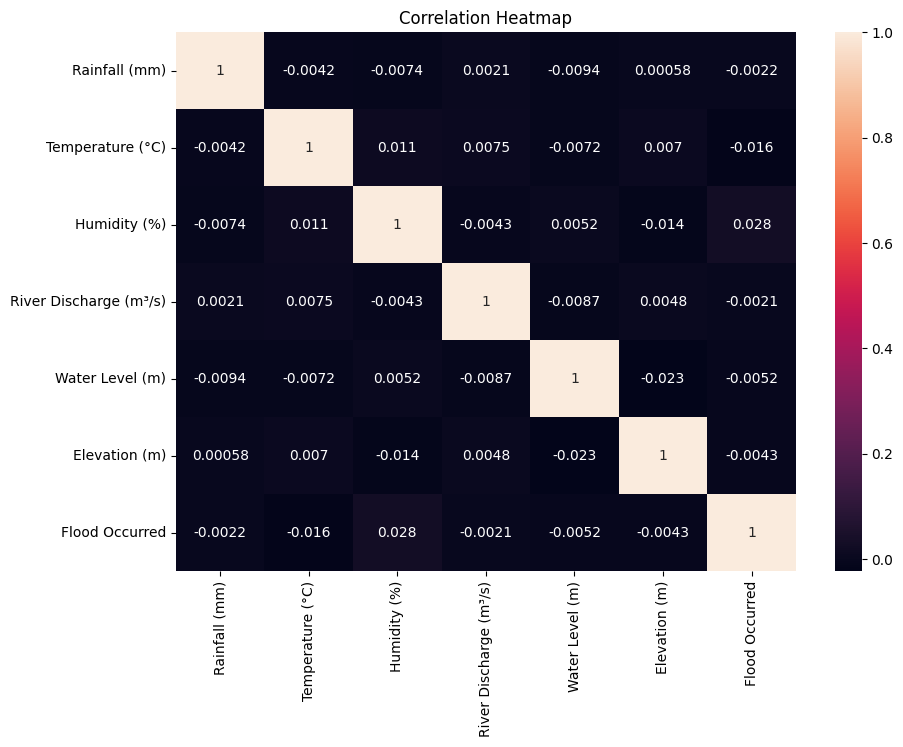

In [1074]:
%matplotlib inline

corr = df[['Rainfall (mm)','Temperature (°C)','Humidity (%)','River Discharge (m³/s)','Water Level (m)','Elevation (m)','Flood Occurred']].corr()

#Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')

In [898]:

# DATA PREPROCESSING


In [899]:
#converting categorical data to numerical form
le=LabelEncoder()
df['Land Cover']=le.fit_transform(df['Land Cover'])
df['Soil Type']=le.fit_transform(df['Soil Type'])
df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,4,0,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,2,2,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,0,1,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1,3,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,0,1,6167.964591,1,0,0


In [900]:
#Inputs
X=df.drop(['Population Density','Infrastructure','Flood Occurred'],axis='columns')
X.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Historical Floods
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,4,0,0
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,2,2,1
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,0,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1,3,1
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,0,1,0


In [901]:
#Target
y=df['Flood Occurred']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Flood Occurred, dtype: int64

In [902]:
#Standardizing input
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [903]:
#Applying PCA
pca=PCA(0.95)
X=pca.fit_transform(X)

#pca gives numpy array so converting it back to df
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.589356,-0.186890,-0.588685,1.311656,0.981932,2.048965,0.024796,-0.252468,-1.123994,0.331119,0.404823
1,-0.439960,-1.602114,0.721233,-0.341465,-0.301472,-0.060482,1.497912,-1.212020,0.851547,1.300962,-0.694228
2,0.177809,0.026416,-0.825882,-1.355112,-0.599016,-0.227865,2.318274,0.418863,-1.176140,1.325423,-0.533069
3,-0.956469,1.125673,0.568025,0.571912,-1.012549,0.168195,0.931155,-1.048338,-0.563342,-0.393717,0.394073
4,0.467742,1.267936,-0.442586,0.975890,0.075629,-0.421884,1.020312,1.533268,-0.753534,0.527875,0.174106


In [904]:
#splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [905]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
2694,-2.319335,-0.418694,0.223093,-0.265280,-0.725396,-0.230952,1.267412,-0.700947,-0.850189,-0.895150,-0.756914
5140,1.097999,0.322072,1.628999,1.716536,0.356192,-0.216736,1.172490,-0.782182,0.024196,-0.367435,1.498533
2568,-0.419725,0.273150,1.709265,-0.190300,-0.331061,-0.368201,1.099488,-1.552048,0.341298,-0.087922,1.327944
3671,-0.016915,0.157242,-1.595414,1.184606,-1.053471,0.085217,-0.402640,-1.219670,-0.756382,2.183935,-0.425466
7427,-0.010913,1.157774,-1.022859,0.013411,0.574783,1.418306,-0.280430,1.122247,1.946886,-0.040956,1.257180


In [906]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10
9953,-1.087339,1.259273,-0.100084,0.398023,-1.725232,-0.664148,-0.063329,0.292872,-0.349096,0.219101,-0.792706
3850,-0.480226,0.842461,-1.133513,-0.947889,-0.571235,0.039826,0.773016,0.507433,0.462828,1.137097,-0.849418
4962,0.563810,0.940942,0.833041,-0.170332,-0.923346,-0.797905,0.685581,0.819251,-1.466701,0.831617,-1.600394
3886,-1.129555,0.604753,1.142001,-1.234988,-0.539746,-0.478964,0.600291,-0.694220,1.072857,-1.361019,0.556735
5437,0.190674,-1.759031,-0.875574,-1.537391,0.193032,-0.361295,-0.420481,-1.873863,1.641317,0.660411,-0.307151


In [907]:
y_train.head()

2694    1
5140    1
2568    1
3671    0
7427    0
Name: Flood Occurred, dtype: int64

In [908]:
y_test.head()

9953    1
3850    0
4962    1
3886    0
5437    1
Name: Flood Occurred, dtype: int64

In [909]:

# MODEL SEELCTION


In [910]:
lr=LogisticRegression(penalty='l2',C=0.000001)
lr.fit(X_train,y_train)

LogisticRegression(C=1e-06)

In [911]:
lr.score(X_test,y_test)

0.5275

In [912]:
rfc=RandomForestClassifier(n_estimators=120)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120)

In [913]:
rfc.score(X_test,y_test)

0.5175

In [914]:
svc=SVC(kernel='linear',C=0.05)
svc.fit(X_train,y_train)

SVC(C=0.05, kernel='linear')

In [915]:
svc.score(X_test,y_test)

0.52

In [1050]:
gbm_clf=GradientBoostingClassifier(learning_rate=10)
gbm_clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=10)

In [1052]:
gbm_clf.score(X_test,y_test)

0.527

Text(70.72222222222221, 0.5, 'Truth')

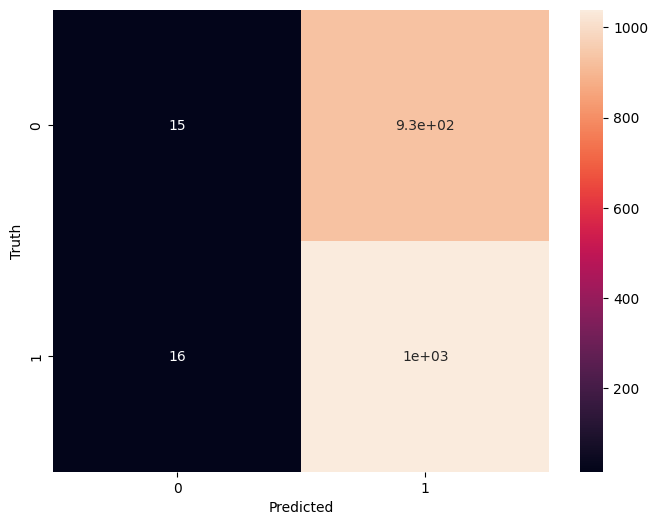

In [1090]:
#Confusion matrix

y_pred=gbm_clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')